# Imports

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os
import sys

In [ ]:
from Lib.lib_python.mlp_py import PyMLP
from Lib.lib_python.regression_simple_py import PyLinearRegression, PyClassification
from Lib.lib_python.rbf_py import PyRBF
from Lib.lib_python.svm_py import PySVM

# Cas de tests, rendu 3

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK
        RBF          : OK

In [ ]:
X = np.array([
      [0.5, 0.7],
      [0.4, 0.5],
      [0.6, 0.6],
      [0.1, 0.7],
      [0.2, 0.8],
      [0.6, 0.4],
      [0.8, 0.6],
      [0.9, 0.3],
      [0.8, 0.1],
      [0.3, 0.1]
])
Y = np.array([
      -1.0,
      -1.0,
      -1.0,
      -1.0,
      -1.0,
      1.0,
      1.0,
      1.0,
      1.0,
      1.0
])

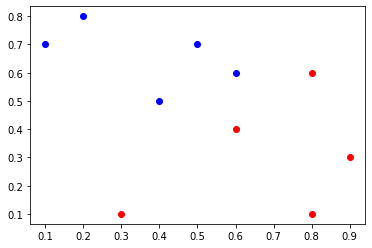

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(X[0:5, 0], X[0:5, 1], color='blue')
plt.scatter(X[5:10,0], X[5:10,1], color='red')
plt.show()
plt.clf()

#### Create models

In [ ]:
#Linear
alpha = 0.01
lin_class = PyClassification(X.shape[1], alpha)

#MLP
layers = [X.shape[1], 1]
lr = 0.001
self = PyMLP(layers, lr, classification_mode=True)

#RBF
n_centroids = 5
rbf = PyRBF(n_centroids, 
            n_samples=X.shape[0],
           n_features=X.shape[1],
           n_outputs=1,
            gamma=0.15,
           classification_mode=True)

#SVM
# svm = PySVM(X.shape[1])

#### Train models

In [ ]:
#Linear
lin_class.fit(X, Y, nb_iters=10000)

#MLP
self.fit(X, Y, 100000)

#RBF
rbf.fit(X, Y)

#SVM
# svm.fit(X, Y)

In [ ]:
#After train
linear_pred = lin_class.predict(X).flatten()
mlp_pred = self.predict(X).flatten()
rbf_pred = rbf.predict(X).flatten()
# svm_pred = rbf.predict(X).flatten()

nb_errors_linear = ((linear_pred - Y) != 0).sum()
nb_errors_mlp = ((mlp_pred * Y) <= 0).sum()
nb_errors_rbf = ((rbf_pred - Y) != 0).sum()
# nb_errors_svm = ((svm_pred - Y) <= 0).sum()

print('{: <20}'.format('Expected') + '  |  ' + '{: <20}'.format('Linear') + '  |  ' + '{: <20}'.format('MLP') + '  |  ' + '{: <20}'.format('RBF'))
for i in range(X.shape[0]):
  print('{: <20}'.format(Y[i]) + '  |  ' + '{: <20}'.format(linear_pred[i]) + '  |  ' + \
        '{: <20}'.format(mlp_pred[i]) + '  |  ' + '{: <20}'.format(rbf_pred[i]))

print()
print("Linear errors : " + str(nb_errors_linear))
print("MLP errors : " + str(nb_errors_mlp))
print("RBF errors : " + str(nb_errors_rbf))
# print("SVM errors : " + str(nb_errors_svm))

Expected              |  Linear                |  MLP                   |  RBF                 
-1.0                  |  -1.0                  |  -0.744143654776197    |  -1.0                
-1.0                  |  -1.0                  |  -0.46828557715578956  |  -1.0                
-1.0                  |  -1.0                  |  -0.26245960567722915  |  -1.0                
-1.0                  |  -1.0                  |  -0.9757337518038975   |  -1.0                
-1.0                  |  -1.0                  |  -0.9789081182615941   |  -1.0                
1.0                   |  1.0                   |  0.45667886455381146   |  1.0                 
1.0                   |  1.0                   |  0.3375308834057376    |  1.0                 
1.0                   |  1.0                   |  0.9472301542366828    |  1.0                 
1.0                   |  1.0                   |  0.978282843810837     |  1.0                 
1.0                   |  1.0            

#### Séparation Linéaire

red= (4672, 2)
blue= (5328, 2)


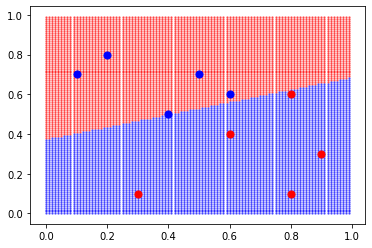

<Figure size 432x288 with 0 Axes>

In [ ]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100

predicted_values = lin_class.predict(test_points).flatten()

red_points = test_points[(predicted_values < 0.0)]
blue_points = test_points[(predicted_values > 0.0)]
print("red=",red_points.shape)
print("blue=",blue_points.shape)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

plt.scatter(X[0:5, 0], X[0:5, 1], color='blue', s=50)
plt.scatter(X[5:10, 0], X[5:10, 1], color='red', s=50)
plt.show()
plt.clf()


#### MLP Separation

[ 0.15896029  0.12151145  0.08371346 ... -0.44618077 -0.47625278
 -0.50525053]
red= (5518, 2)
blue= (4482, 2)


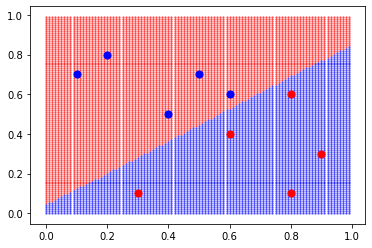

<Figure size 432x288 with 0 Axes>

In [ ]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100

predicted_values = self.predict(test_points).flatten()
print(predicted_values)

red_points = test_points[(predicted_values < 0.0)]
blue_points = test_points[(predicted_values > 0.0)]
print("red=",red_points.shape)
print("blue=",blue_points.shape)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

plt.scatter(X[0:5, 0], X[0:5, 1], color='blue', s=50)
plt.scatter(X[5:10, 0], X[5:10, 1], color='red', s=50)
plt.show()
plt.clf()


#### RBF Separation

red= (4241, 2)
blue= (5759, 2)


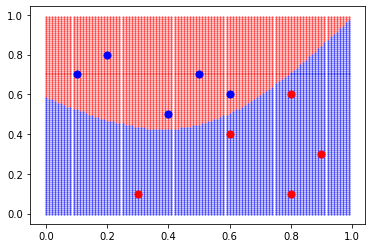

<Figure size 432x288 with 0 Axes>

In [ ]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100

predicted_values = rbf.predict(test_points).flatten()

red_points = test_points[(predicted_values < 0.0)]
blue_points = test_points[(predicted_values > 0.0)]
print("red=",red_points.shape)
print("blue=",blue_points.shape)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

plt.scatter(X[0:5, 0], X[0:5, 1], color='blue', s=50)
plt.scatter(X[5:10, 0], X[5:10, 1], color='red', s=50)
plt.show()
plt.clf()


#### Delete models

In [ ]:
lin_class.delete()
self.delete()
rbf.delete()

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK
        RBF          : OK

In [ ]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50)), np.ones((50)) * -1.0])

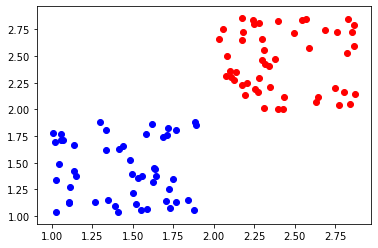

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

#### Create models

In [ ]:
#Linear
alpha = 0.01
lin_class = PyClassification(X.shape[1], alpha)

#MLP
layers = [X.shape[1], 1]
lr = 0.001
self = PyMLP(layers, lr, classification_mode=True)

#RBF
n_centroids = 5
rbf = PyRBF(n_centroids, 
            n_samples=X.shape[0],
           n_features=X.shape[1],
           n_outputs=1,
            gamma=0.15,
           classification_mode=True)

#### Train models

In [ ]:
#Linear
lin_class.fit(X, Y, nb_iters=10000)

#MLP
self.fit(X, Y, 100000)

#RBF
rbf.fit(X, Y)

In [ ]:
#After train
linear_pred = lin_class.predict(X).flatten()
mlp_pred = self.predict(X).flatten()
rbf_pred = rbf.predict(X).flatten()

nb_errors_linear = ((linear_pred - Y) != 0).sum()
nb_errors_mlp = ((mlp_pred * Y) <= 0).sum()
nb_errors_rbf = ((rbf_pred - Y) != 0).sum()

print('{: <20}'.format('Expected') + '  |  ' + '{: <20}'.format('Linear') + '  |  ' + '{: <20}'.format('MLP') + '  |  ' + '{: <20}'.format('RBF'))
for i in range(X.shape[0]):
  print('{: <20}'.format(Y[i]) + '  |  ' + '{: <20}'.format(linear_pred[i]) + '  |  ' + '{: <20}'.format(mlp_pred[i]) + '  |  ' + '{: <20}'.format(rbf_pred[i]))

print()
print("Linear errors : " + str(nb_errors_linear))
print("MLP errors : " + str(nb_errors_mlp))
print("RBF errors : " + str(nb_errors_rbf))

#### Linear Separation

red= (5162, 2)
blue= (4838, 2)


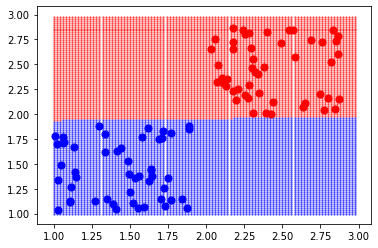

<Figure size 432x288 with 0 Axes>

In [ ]:
nb_points = 100
test_points = np.array([[i, j] for i in range(nb_points) for j in range(nb_points)], dtype='float64') / nb_points * 2.0 + 1.0

predicted_values = lin_class.predict(test_points).flatten()

red_points = test_points[(predicted_values < 0.0)]
blue_points = test_points[(predicted_values > 0.0)]
print("red=",red_points.shape)
print("blue=",blue_points.shape)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

plt.scatter(X[0:50, 0], X[0:50, 1], color='blue', s=50)
plt.scatter(X[50:100, 0], X[50:100, 1], color='red', s=50)
plt.show()
plt.clf()


#### MLP Separation

red= (5655, 2)
blue= (4345, 2)


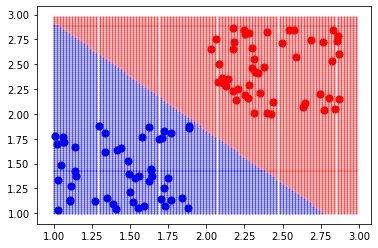

<Figure size 432x288 with 0 Axes>

In [ ]:
nb_points = 100
test_points = np.array([[i, j] for i in range(nb_points) for j in range(nb_points)], dtype='float64') / nb_points * 2.0 + 1.0

predicted_values = self.predict(test_points).flatten()

red_points = test_points[(predicted_values < 0.0)]
blue_points = test_points[(predicted_values > 0.0)]
print("red=",red_points.shape)
print("blue=",blue_points.shape)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

plt.scatter(X[0:50, 0], X[0:50, 1], color='blue', s=50)
plt.scatter(X[50:100, 0], X[50:100, 1], color='red', s=50)
plt.show()
plt.clf()


#### RBF Separation

red= (5506, 2)
blue= (4494, 2)


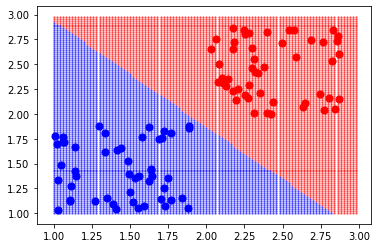

<Figure size 432x288 with 0 Axes>

In [ ]:
nb_points = 100
test_points = np.array([[i, j] for i in range(nb_points) for j in range(nb_points)], dtype='float64') / nb_points * 2.0 + 1.0

predicted_values = rbf.predict(test_points).flatten()

red_points = test_points[(predicted_values < 0.0)]
blue_points = test_points[(predicted_values > 0.0)]
print("red=",red_points.shape)
print("blue=",blue_points.shape)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

plt.scatter(X[0:50, 0], X[0:50, 1], color='blue', s=50)
plt.scatter(X[50:100, 0], X[50:100, 1], color='red', s=50)
plt.show()
plt.clf()


#### Delete models

In [ ]:
lin_class.delete()
self.delete()
rbf.delete()

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK
        RBF (cluster=4) : OK

In [ ]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]], dtype='float64')
Y = np.array([1, 1, -1, -1], dtype='float64')

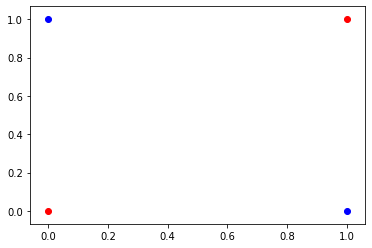

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

#### Create models

In [ ]:
#Linear
alpha = 0.1
lin_class = PyClassification(X.shape[1], alpha)

#MLP
layers = [X.shape[1], 2, 1]
lr = 0.001
self = PyMLP(layers, lr, classification_mode=True)

#RBF
n_centroids = 4
rbf = PyRBF(n_centroids, 
            n_samples=X.shape[0],
           n_features=X.shape[1],
           n_outputs=1,
            gamma=0.15,
           classification_mode=True)

#### Train models

In [ ]:
#Linear
lin_class.fit(X, Y, nb_iters=100)

#MLP
self.fit(X, Y, 100000)

#RBF
rbf.fit(X, Y)

In [ ]:
#After train
linear_pred = lin_class.predict(X).flatten()
mlp_pred = self.predict(X).flatten()
rbf_pred = rbf.predict(X).flatten()

nb_errors_linear = ((linear_pred - Y) != 0).sum()
nb_errors_mlp = ((mlp_pred * Y) <= 0).sum()
nb_errors_rbf = ((rbf_pred - Y) != 0).sum()

print('{: <20}'.format('Expected') + '  |  ' + '{: <20}'.format('Linear') + '  |  ' + '{: <20}'.format('MLP') + '  |  ' + '{: <20}'.format('RBF'))
for i in range(X.shape[0]):
  print('{: <20}'.format(Y[i]) + '  |  ' + '{: <20}'.format(linear_pred[i]) + '  |  ' + '{: <20}'.format(mlp_pred[i]) + '  |  ' + '{: <20}'.format(rbf_pred[i]))

print()
print("Linear errors : " + str(nb_errors_linear))
print("MLP errors : " + str(nb_errors_mlp))
print("RBF errors : " + str(nb_errors_rbf))

Expected              |  Linear                |  MLP                   |  RBF                 
1.0                   |  1.0                   |  0.8919829889546909    |  1.0                 
1.0                   |  -1.0                  |  0.897732104052855     |  1.0                 
-1.0                  |  -1.0                  |  -0.9115531816049012   |  -1.0                
-1.0                  |  1.0                   |  -0.9232845015957353   |  -1.0                

Linear errors : 2
MLP errors : 0
RBF errors : 0


#### Linear Separation

red= (6639, 2)
blue= (3361, 2)


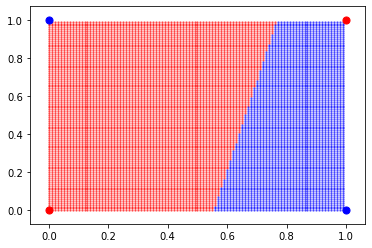

<Figure size 432x288 with 0 Axes>

In [ ]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100

predicted_values = lin_class.predict(test_points).flatten()

red_points = test_points[(predicted_values < 0.0)]
blue_points = test_points[(predicted_values > 0.0)]
print("red=",red_points.shape)
print("blue=",blue_points.shape)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

plt.scatter(X[0:2, 0], X[0:2, 1], color='blue', s=50)
plt.scatter(X[2:4, 0], X[2:4, 1], color='red', s=50)
plt.show()
plt.clf()


#### MLP Separation

red= (8077, 2)
blue= (1923, 2)


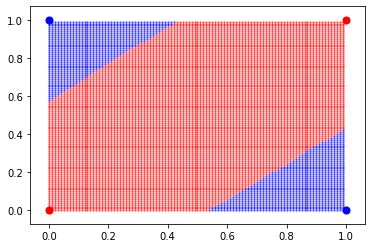

<Figure size 432x288 with 0 Axes>

In [ ]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100

predicted_values = self.predict(test_points).flatten()

red_points = test_points[(predicted_values < 0.0)]
blue_points = test_points[(predicted_values > 0.0)]
print("red=",red_points.shape)
print("blue=",blue_points.shape)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

plt.scatter(X[0:2, 0], X[0:2, 1], color='blue', s=50)
plt.scatter(X[2:4, 0], X[2:4, 1], color='red', s=50)
plt.show()
plt.clf()


#### RBF Separation

red= (5100, 2)
blue= (4900, 2)


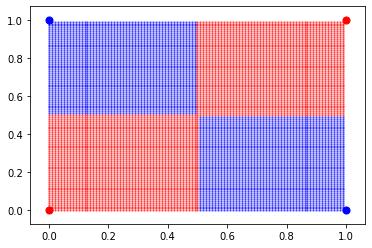

<Figure size 432x288 with 0 Axes>

In [ ]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100

predicted_values = rbf.predict(test_points).flatten()

red_points = test_points[(predicted_values < 0.0)]
blue_points = test_points[(predicted_values > 0.0)]
print("red=",red_points.shape)
print("blue=",blue_points.shape)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

plt.scatter(X[0:2, 0], X[0:2, 1], color='blue', s=50)
plt.scatter(X[2:4, 0], X[2:4, 1], color='red', s=50)
plt.show()
plt.clf()


#### Delete models

In [ ]:
lin_class.delete()
self.delete()
rbf.delete()

### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK
        RBF (cluster=9) : OK

In [ ]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X], dtype='float64')

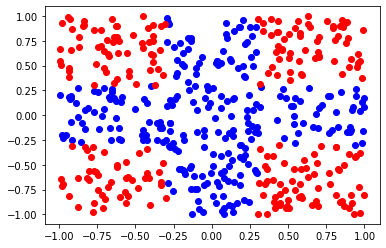

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

#### Create models

In [ ]:
#Linear
alpha = 0.01
lin_class = PyClassification(X.shape[1], alpha)

#MLP
layers = [X.shape[1], 4, 1]
lr = 0.01
self = PyMLP(layers, lr, classification_mode=True)

#RBF
n_centroids = 9
rbf = PyRBF(n_centroids, 
            n_samples=X.shape[0],
           n_features=X.shape[1],
           n_outputs=1,
            gamma=5,
           classification_mode=True)

#### Train models

In [ ]:
#Linear
lin_class.fit(X, Y, nb_iters=10000)

#MLP
self.fit(X, Y, 1000000)

#RBF
rbf.fit(X, Y)

In [ ]:
#After train
linear_pred = lin_class.predict(X).flatten()
mlp_pred = self.predict(X).flatten()
rbf_pred = rbf.predict(X).flatten()

nb_errors_linear = ((linear_pred - Y) != 0).sum()
nb_errors_mlp = ((mlp_pred * Y) <= 0).sum()
nb_errors_rbf = ((rbf_pred - Y) != 0).sum()

print('{: <20}'.format('Expected') + '  |  ' + '{: <20}'.format('Linear') + '  |  ' + '{: <20}'.format('MLP') + '  |  ' + '{: <20}'.format('RBF'))
# for i in range(X.shape[0]):
#   print('{: <20}'.format(Y[i]) + '  |  ' + '{: <20}'.format(linear_pred[i]) + '  |  ' + '{: <20}'.format(mlp_pred[i]) + '  |  ' + '{: <20}'.format(rbf_pred[i]))

print()
print("Linear errors : " + str(nb_errors_linear))
print("MLP errors : " + str(nb_errors_mlp))
print("RBF errors : " + str(nb_errors_rbf))

Expected              |  Linear                |  MLP                   |  RBF                 

Linear errors : 214
MLP errors : 3
RBF errors : 34


#### Linear Separation

red= (1987, 2)
blue= (8013, 2)


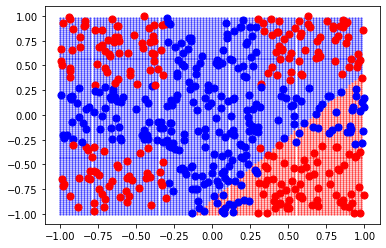

<Figure size 432x288 with 0 Axes>

In [ ]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100 * 2 - 1

predicted_values = lin_class.predict(test_points).flatten()

red_points = test_points[(predicted_values < 0.0)]
blue_points = test_points[(predicted_values > 0.0)]
print("red=",red_points.shape)
print("blue=",blue_points.shape)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

for i in range(len(X)):
    if Y[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='blue', s=50)
    else:
        plt.scatter(X[i, 0], X[i, 1], color='red', s=50)
plt.show()
plt.clf()


#### MLP Separation

[-0.98842679 -0.98842679 -0.98842679 ... -0.99984716 -0.99984716
 -0.99984716]
red= (5013, 2)
blue= (4987, 2)


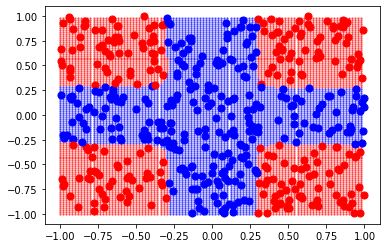

<Figure size 432x288 with 0 Axes>

In [ ]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100 * 2 - 1

predicted_values = self.predict(test_points).flatten()
print(predicted_values)

red_points = test_points[(predicted_values < 0.0)]
blue_points = test_points[(predicted_values > 0.0)]
print("red=",red_points.shape)
print("blue=",blue_points.shape)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

for i in range(len(X)):
    if Y[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='blue', s=50)
    else:
        plt.scatter(X[i, 0], X[i, 1], color='red', s=50)
plt.show()
plt.clf()

#### RBF Separation

[-1. -1. -1. ... -1. -1. -1.]
red= (4393, 2)
blue= (5607, 2)


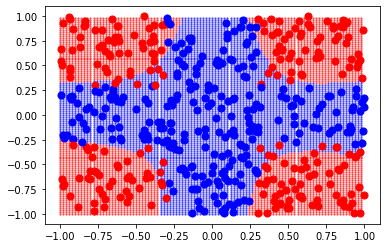

<Figure size 432x288 with 0 Axes>

In [ ]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100 * 2 - 1

predicted_values = rbf.predict(test_points).flatten()
print(predicted_values)

red_points = test_points[(predicted_values < 0.0)]
blue_points = test_points[(predicted_values > 0.0)]
print("red=",red_points.shape)
print("blue=",blue_points.shape)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

for i in range(len(X)):
    if Y[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='blue', s=50)
    else:
        plt.scatter(X[i, 0], X[i, 1], color='red', s=50)
plt.show()
plt.clf()


#### Delete models

In [ ]:
lin_class.delete()
self.delete()
rbf.delete()

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK
        RBF             : OK

In [ ]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, -1, -1] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [-1, 1, -1] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [-1, -1, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [-1, -1, -1] for p in X], dtype='float64')

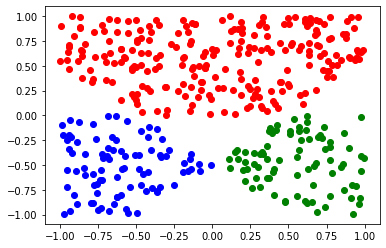

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

####Create models


In [ ]:
#Linear
alpha = 0.01
Y_1 = Y[:, 0]
lin_class_1 = PyClassification(X.shape[1], alpha)
Y_2 = Y[:, 1]
lin_class_2 = PyClassification(X.shape[1], alpha)
Y_3 = Y[:, 2]
lin_class_3 = PyClassification(X.shape[1], alpha)


#MLP
layers = [X.shape[1], Y.shape[1]]
lr = 0.001
self = PyMLP(layers, lr, classification_mode=True)

#RBF
n_centroids = 3
rbf = PyRBF(n_centroids, 
            n_samples=X.shape[0],
           n_features=X.shape[1],
           n_outputs=Y.shape[1],
            gamma=0.2,
           classification_mode=True)

#### Train models

In [ ]:
#Linear
lin_class_1.fit(X, Y_1, nb_iters=100000)
lin_class_2.fit(X, Y_2, nb_iters=100000)
lin_class_3.fit(X, Y_3, nb_iters=100000)

#MLP
self.fit(X, Y, 1000000)

#RBF
rbf.fit(X, Y)

In [ ]:
#After train
linear_pred = np.concatenate((np.reshape(lin_class_1.predict(X), (X.shape[0], 1)),
                             np.reshape(lin_class_2.predict(X), (X.shape[0], 1)),
                             np.reshape(lin_class_3.predict(X), (X.shape[0], 1))), 
                             axis=1)
mlp_pred = self.predict(X)
rbf_pred = rbf.predict(X)

print(np.apply())

nb_errors_linear = ((linear_pred - Y) != 0).sum(axis=0)
nb_errors_mlp = ((mlp_pred * Y) <= 0).sum(axis=0)
nb_errors_rbf = ((rbf_pred - Y) != 0).sum(axis=0)

print('{: <20}'.format('Expected') + '  |  ' + '{: <20}'.format('Linear') + '  |  ' + '{: <20}'.format('MLP') + '  |  ' + '{: <20}'.format('RBF'))
# for i in range(X.shape[0]):
#   print('{: <20}'.format(Y[i, :]) + '  |  ' + '{: <20}'.format(linear_pred[i, :]) + '  |  ' + '{: <20}'.format(mlp_pred[i, :]) + '  |  ' + '{: <20}'.format(rbf_pred[i, :]))

print()
print("Linear errors : " + str(nb_errors_linear))
print("MLP errors : " + str(nb_errors_mlp))
print("RBF errors : " + str(nb_errors_rbf))

[[False  True False]
 [False  True False]
 [False  True False]
 ...
 [False False  True]
 [False  True False]
 [False  True False]]
Expected              |  Linear                |  MLP                   |  RBF                 

Linear errors : [51 38 52]
MLP errors : [38 34 44]
RBF errors : [55 32 62]


#### Linear Separation

(10000, 3)


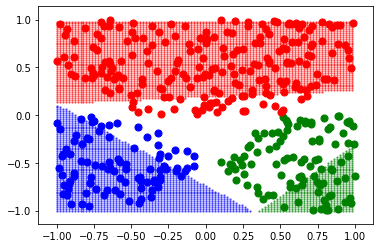

<Figure size 432x288 with 0 Axes>

In [ ]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100 * 2 - 1

predicted_values = np.concatenate((lin_class_1.predict(test_points),
                             lin_class_2.predict(test_points),
                             lin_class_3.predict(test_points)),
                             axis=1)
print(predicted_values.shape)

plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][0] == 1, enumerate(test_points)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][0] == 1, enumerate(test_points)))))[:,1], color='blue', alpha=0.5, s=2)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][1] == 1, enumerate(test_points)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][1] == 1, enumerate(test_points)))))[:,1], color='red', alpha=0.5, s=2)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][2] == 1, enumerate(test_points)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][2] == 1, enumerate(test_points)))))[:,1], color='green', alpha=0.5, s=2)

# blue_points = test_points[[i for i in range(10000) if predicted_values[i, 0] == 1.], :]
# red_points = test_points[[i for i in range(10000) if predicted_values[i, 1] == 1.], :]
# green_points = test_points[[i for i in range(10000) if predicted_values[i, 2] == 1.], :]

# if len(red_points) > 0:
#     plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
# if len(blue_points) > 0:
#     plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
# if len(green_points) > 0:
#     plt.scatter(green_points[:, 0], green_points[:, 1], color='green', alpha=0.5, s=2)

for i in range(len(X)):
    if Y[i][0] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='blue', s=50)
    elif Y[i][1] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='red', s=50)
    elif Y[i][2] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='green', s=50)
plt.show()
plt.clf()


#### MLP Separation

(10000, 3)


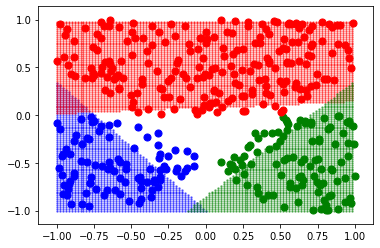

<Figure size 432x288 with 0 Axes>

In [ ]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100 * 2 - 1

predicted_values = self.predict(test_points)
print(predicted_values.shape)

plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][0] > 0., enumerate(test_points)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][0] > 0., enumerate(test_points)))))[:,1], color='blue', alpha=0.5, s=2)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][1] > 0., enumerate(test_points)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][1] > 0., enumerate(test_points)))))[:,1], color='red', alpha=0.5, s=2)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][2] > 0., enumerate(test_points)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][2] > 0., enumerate(test_points)))))[:,1], color='green', alpha=0.5, s=2)

# blue_points = test_points[[i for i in range(10000) if predicted_values[i, 0] > 0.], :]
# red_points = test_points[[i for i in range(10000) if predicted_values[i, 1] > 0.], :]
# green_points = test_points[[i for i in range(10000) if predicted_values[i, 2] > 0.], :]

# if len(red_points) > 0:
#     plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
# if len(blue_points) > 0:
#     plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
# if len(green_points) > 0:
#     plt.scatter(green_points[:, 0], green_points[:, 1], color='green', alpha=0.5, s=2)

for i in range(len(X)):
    if Y[i][0] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='blue', s=50)
    elif Y[i][1] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='red', s=50)
    elif Y[i][2] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='green', s=50)
plt.show()
plt.clf()


#### RBF Separation

(10000, 3)


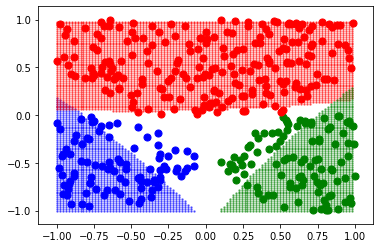

<Figure size 432x288 with 0 Axes>

In [ ]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100 * 2 - 1

predicted_values = rbf.predict(test_points)
print(predicted_values.shape)

plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][0] > 0., enumerate(test_points)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][0] > 0., enumerate(test_points)))))[:,1], color='blue', alpha=0.5, s=2)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][1] > 0., enumerate(test_points)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][1] > 0., enumerate(test_points)))))[:,1], color='red', alpha=0.5, s=2)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][2] > 0., enumerate(test_points)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][2] > 0., enumerate(test_points)))))[:,1], color='green', alpha=0.5, s=2)

for i in range(len(X)):
    if Y[i][0] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='blue', s=50)
    elif Y[i][1] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='red', s=50)
    elif Y[i][2] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='green', s=50)
plt.show()
plt.clf()


#### Delete models

In [ ]:
lin_class_1.delete()
lin_class_2.delete()
lin_class_3.delete()
self.delete()
rbf.delete()

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, 128, 64, 3): OK
        RBF (cluster = 64) : OK

In [ ]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, -1, -1] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [-1, 1, -1] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [-1, -1, 1] for p in X], dtype='float64')

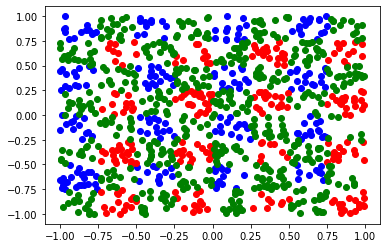

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

####Create models


In [ ]:
#Linear
alpha = 0.01
Y_1 = Y[:, 0]
lin_class_1 = PyClassification(X.shape[1], alpha)
Y_2 = Y[:, 1]
lin_class_2 = PyClassification(X.shape[1], alpha)
Y_3 = Y[:, 2]
lin_class_3 = PyClassification(X.shape[1], alpha)


#MLP
layers = [X.shape[1], 128, 64, Y.shape[1]]
lr = 0.005
self = PyMLP(layers, lr, classification_mode=True)

#RBF
n_centroids = 64
rbf = PyRBF(n_centroids, 
            n_samples=X.shape[0],
           n_features=X.shape[1],
           n_outputs=Y.shape[1],
            gamma=50,
           classification_mode=True)

#### Train models

In [ ]:
#Linear
lin_class_1.fit(X, Y_1, nb_iters=10000)
lin_class_2.fit(X, Y_2, nb_iters=10000)
lin_class_3.fit(X, Y_3, nb_iters=10000)

In [ ]:
#MLP
self.fit(X, Y, 500000)

In [ ]:
#RBF
rbf.fit(X, Y)

In [ ]:
#After train
linear_pred = np.concatenate((np.reshape(lin_class_1.predict(X), (X.shape[0], 1)),
                             np.reshape(lin_class_2.predict(X), (X.shape[0], 1)),
                             np.reshape(lin_class_3.predict(X), (X.shape[0], 1))), axis=1)
mlp_pred = self.predict(X)
rbf_pred = rbf.predict(X)

nb_errors_linear = ((linear_pred - Y) != 0).sum(axis=0)
nb_errors_mlp = ((mlp_pred * Y) <= 0).sum(axis=0)
nb_errors_rbf = ((rbf_pred - Y) != 0).sum(axis=0)

print('{: <20}'.format('Expected') + '  |  ' + '{: <20}'.format('Linear') + '  |  ' + '{: <20}'.format('MLP') + '  |  ' + '{: <20}'.format('RBF'))
# for i in range(X.shape[0]):
#   print('{: <20}'.format(Y[i]) + '  |  ' + '{: <20}'.format(linear_pred[i]) + '  |  ' + '{: <20}'.format(mlp_pred[i]) + '  |  ' + '{: <20}'.format(rbf_pred[i]))

print()
print("Linear errors : " + str(nb_errors_linear))
print("MLP errors : " + str(nb_errors_mlp))
print("RBF errors : " + str(nb_errors_rbf))

Expected              |  Linear                |  MLP                   |  RBF                 

Linear errors : [487 428 484]
MLP errors : [ 16  22 168]
RBF errors : [235 258 507]


#### Linear Separation

(10000, 3)


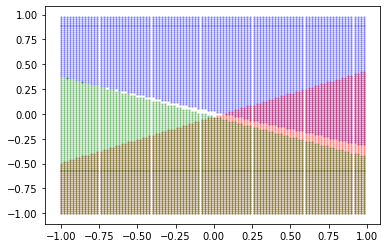

<Figure size 432x288 with 0 Axes>

In [ ]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100 * 2 - 1

predicted_values = np.concatenate((np.reshape(lin_class_1.predict(test_points), (test_points.shape[0], 1)),
                                  np.reshape(lin_class_2.predict(test_points), (test_points.shape[0], 1)),
                                  np.reshape(lin_class_3.predict(test_points), (test_points.shape[0], 1))), axis=1)
print(predicted_values.shape)

plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][0] > 0, enumerate(test_points)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][0] > 0, enumerate(test_points)))))[:,1], color='blue', alpha=0.3, s=2)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][1] > 0, enumerate(test_points)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][1] > 0, enumerate(test_points)))))[:,1], color='red', alpha=0.3, s=2)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][2] > 0, enumerate(test_points)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][2] > 0, enumerate(test_points)))))[:,1], color='green', alpha=0.3, s=2)

# blue_points = test_points[[i for i in range(10000) if predicted_values[i, 0] == 1.], :]
# red_points = test_points[[i for i in range(10000) if predicted_values[i, 1] == 1.], :]
# green_points = test_points[[i for i in range(10000) if predicted_values[i, 2] == 1.], :]

# if len(red_points) > 0:
#     plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
# if len(blue_points) > 0:
#     plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
# if len(green_points) > 0:
#     plt.scatter(green_points[:, 0], green_points[:, 1], color='green', alpha=0.5, s=2)

# for i in range(len(X)):
#     if Y[i][0] == 1:
#         plt.scatter(X[i, 0], X[i, 1], color='blue', s=50)
#     elif Y[i][1] == 1:
#         plt.scatter(X[i, 0], X[i, 1], color='red', s=50)
#     elif Y[i][2] == 1:
#         plt.scatter(X[i, 0], X[i, 1], color='green', s=50)
plt.show()
plt.clf()


#### MLP Separation

(10000, 3)


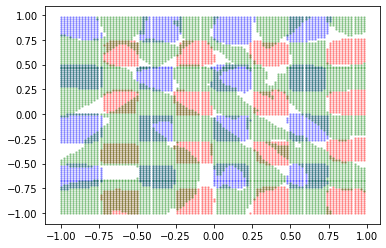

<Figure size 432x288 with 0 Axes>

In [ ]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100 * 2 - 1

predicted_values = self.predict(test_points)
print(predicted_values.shape)

plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][0] > 0, enumerate(test_points)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][0] > 0, enumerate(test_points)))))[:,1], color='blue', alpha=0.3, s=2)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][1] > 0, enumerate(test_points)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][1] > 0, enumerate(test_points)))))[:,1], color='red', alpha=0.3, s=2)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][2] > 0, enumerate(test_points)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][2] > 0, enumerate(test_points)))))[:,1], color='green', alpha=0.3, s=2)

# blue_points = test_points[[i for i in range(10000) if predicted_values[i, 0] > 0.], :]
# red_points = test_points[[i for i in range(10000) if predicted_values[i, 1] > 0.], :]
# green_points = test_points[[i for i in range(10000) if predicted_values[i, 2] > 0.], :]

# if len(red_points) > 0:
#     plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
# if len(blue_points) > 0:
#     plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
# if len(green_points) > 0:
#     plt.scatter(green_points[:, 0], green_points[:, 1], color='green', alpha=0.5, s=2)

# for i in range(len(X)):
#     if Y[i][0] == 1:
#         plt.scatter(X[i, 0], X[i, 1], color='blue', s=50)
#     elif Y[i][1] == 1:
#         plt.scatter(X[i, 0], X[i, 1], color='red', s=50)
#     elif Y[i][2] == 1:
#         plt.scatter(X[i, 0], X[i, 1], color='green', s=50)
plt.show()
plt.clf()


#### RBF Separation

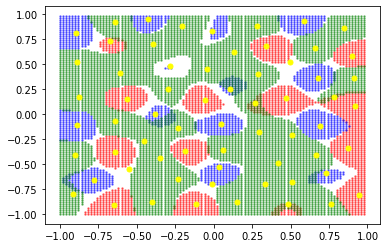

<Figure size 432x288 with 0 Axes>

In [ ]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100 * 2 - 1

predicted_values = rbf.predict(test_points)

# plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][0] > 0., enumerate(test_points)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][0] > 0., enumerate(test_points)))))[:,1], color='blue', alpha=0.3, s=2)
# plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][1] > 0., enumerate(test_points)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][1] > 0., enumerate(test_points)))))[:,1], color='red', alpha=0.3, s=2)
# plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][2] > 0., enumerate(test_points)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: predicted_values[c[0]][2] > 0., enumerate(test_points)))))[:,1], color='green', alpha=0.3, s=2)

blue_points = test_points[[i for i in range(10000) if predicted_values[i, 0] > 0.], :]
red_points = test_points[[i for i in range(10000) if predicted_values[i, 1] > 0.], :]
green_points = test_points[[i for i in range(10000) if predicted_values[i, 2] > 0.], :]

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
if len(green_points) > 0:
    plt.scatter(green_points[:, 0], green_points[:, 1], color='green', alpha=0.5, s=2)

clusters = rbf.get_centroids()
plt.scatter(clusters[:, 0], clusters[:, 1], color='yellow', s=25)

plt.show()
plt.clf()


#### Delete models

In [ ]:
lin_class_1.delete()
lin_class_2.delete()
lin_class_3.delete()
self.delete()
rbf.delete()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK
        RBF          : OK

In [ ]:
X = np.array([
      [1.0],
      [2.0]
])
Y = np.array([
      2.0,
      3.0
])

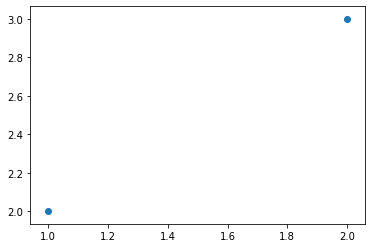

1


<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()
print(X.shape[1])

####Create models


In [ ]:
#Linear
lin_reg = PyLinearRegression(X.shape[1])

#MLP
layers = [X.shape[1], 1]
lr = 0.01
self = PyMLP(layers, lr, classification_mode=False)

#RBF
n_centroids = 0
rbf = PyRBF(n_centroids, 
            n_samples=X.shape[0],
           n_features=X.shape[1],
           n_outputs=1,
            gamma=0.2,
           classification_mode=False)

#### Train models

In [ ]:
#Linear
lin_reg.fit(X, Y)

#MLP
self.fit(X, Y, 1000)

#RBF
rbf.fit(X, Y)

In [ ]:
#After train
linear_pred = lin_reg.predict(X).flatten()
mlp_pred = self.predict(X).flatten()
rbf_pred = rbf.predict(X).flatten()

nb_errors_linear = (abs(linear_pred - Y) > 0.1).sum()
nb_errors_mlp = (abs(mlp_pred - Y) > 0.1).sum()
nb_errors_rbf = (abs(rbf_pred - Y) > 0.1).sum()

print('{: <20}'.format('Expected') + '  |  ' + '{: <20}'.format('Linear') + '  |  ' + '{: <20}'.format('MLP') + '  |  ' + '{: <20}'.format('RBF'))
for i in range(X.shape[0]):
  print('{: <20}'.format(Y[i]) + '  |  ' + '{: <20}'.format(linear_pred[i]) + '  |  ' + '{: <20}'.format(mlp_pred[i]) + '  |  ' + '{: <20}'.format(rbf_pred[i]))

print()
print("Linear errors : " + str(nb_errors_linear))
print("MLP errors : " + str(nb_errors_mlp))
print("RBF errors : " + str(nb_errors_rbf))

Expected              |  Linear                |  MLP                   |  RBF                 
2.0                   |  2.000000000000001     |  1.971127115827649     |  1.9999999999999998  
3.0                   |  3.0000000000000018    |  3.018169859314516     |  2.9999999999999996  

Linear errors : 0
MLP errors : 0
RBF errors : 0


#### Linear Separation

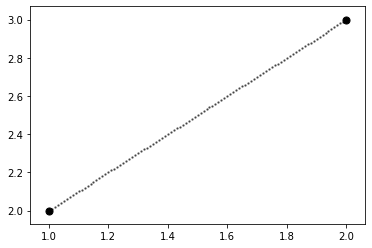

<Figure size 432x288 with 0 Axes>

In [ ]:
test_points = np.array([[i] for i in range(100)], dtype='float64') / 100 + 1

predicted_points = lin_reg.predict(test_points).flatten()

plt.scatter(test_points, predicted_points, color='black', alpha=0.5, s=2)
plt.scatter(X, Y, color='black', s=50)

plt.show()
plt.clf()


#### MLP Separation

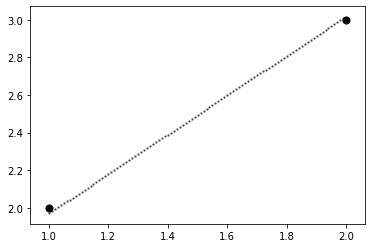

<Figure size 432x288 with 0 Axes>

In [ ]:
test_points = np.array([[i] for i in range(100)], dtype='float64') / 100 + 1

predicted_points = self.predict(test_points).flatten()

plt.scatter(test_points, predicted_points, color='black', alpha=0.5, s=2)
plt.scatter(X, Y, color='black', s=50)

plt.show()
plt.clf()


#### RBF Separation

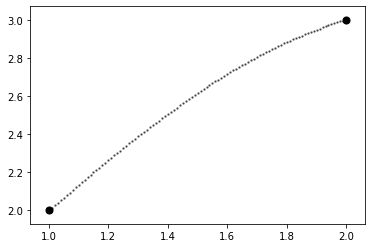

<Figure size 432x288 with 0 Axes>

In [ ]:
test_points = np.array([[i] for i in range(100)], dtype='float64') / 100 + 1

predicted_points = rbf.predict(test_points).flatten()

plt.scatter(test_points, predicted_points, color='black', alpha=0.5, s=2)
plt.scatter(X, Y, color='black', s=50)

plt.show()
plt.clf()


#### Delete models

In [ ]:
lin_reg.delete()
self.delete()
rbf.delete()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, 3, 1)   : OK
        RBF             : OK

In [ ]:
X = np.array([
      [1.0],
      [2.0],
      [3.0]
])
Y = np.array([
      2.0,
      3.0,
      2.5
])

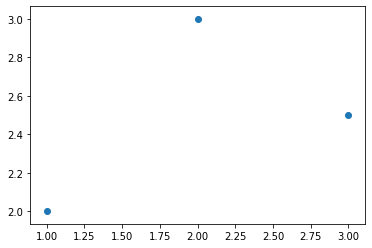

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

####Create models


In [ ]:
#Linear
lin_reg = PyLinearRegression(X.shape[1])

#MLP
layers = [X.shape[1], 3, 1]
lr = 0.03
self = PyMLP(layers, lr, classification_mode=False)

#RBF
n_centroids = 0
rbf = PyRBF(n_centroids, 
            n_samples=X.shape[0],
           n_features=X.shape[1],
           n_outputs=1,
            gamma=0.2,
           classification_mode=False)

#### Train models

In [ ]:
#Linear
lin_reg.fit(X, Y)

#MLP
self.fit(X, Y, 100000)

#RBF
rbf.fit(X, Y)

In [ ]:
#After train
linear_pred = lin_reg.predict(X).flatten()
mlp_pred = self.predict(X).flatten()
rbf_pred = rbf.predict(X).flatten()

nb_errors_linear = (abs(linear_pred - Y) > 0.1).sum()
nb_errors_mlp = (abs(mlp_pred - Y) > 0.1).sum()
nb_errors_rbf = (abs(rbf_pred - Y) > 0.1).sum()

print('{: <20}'.format('Expected') + '  |  ' + '{: <20}'.format('Linear') + '  |  ' + '{: <20}'.format('MLP') + '  |  ' + '{: <20}'.format('RBF'))
for i in range(X.shape[0]):
  print('{: <20}'.format(Y[i]) + '  |  ' + '{: <20}'.format(linear_pred[i]) + '  |  ' + '{: <20}'.format(mlp_pred[i]) + '  |  ' + '{: <20}'.format(rbf_pred[i]))

print()
print("Linear errors : " + str(nb_errors_linear))
print("MLP errors : " + str(nb_errors_mlp))
print("RBF errors : " + str(nb_errors_rbf))

Expected              |  Linear                |  MLP                   |  RBF                 
2.0                   |  2.2499999999999996    |  2.0000000000000004    |  1.9999999999999971  
3.0                   |  2.4999999999999996    |  2.9999999999999973    |  2.999999999999997   
2.5                   |  2.7499999999999996    |  2.500000000000001     |  2.499999999999998   

Linear errors : 3
MLP errors : 0
RBF errors : 0


#### Linear Separation

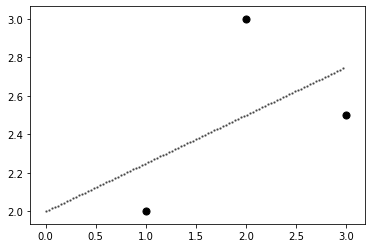

<Figure size 432x288 with 0 Axes>

In [ ]:
test_points = np.array([[i] for i in range(100)], dtype='float64') / 100 * X.shape[0]

predicted_points = lin_reg.predict(test_points).flatten()

plt.scatter(test_points, predicted_points, color='black', alpha=0.5, s=2)
plt.scatter(X, Y, color='black', s=50)

plt.show()
plt.clf()


#### MLP Separation

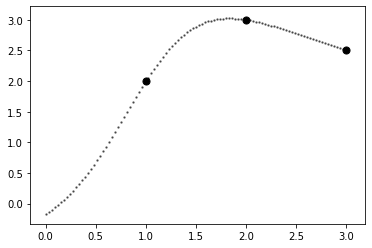

<Figure size 432x288 with 0 Axes>

In [ ]:
test_points = np.array([[i] for i in range(100)], dtype='float64') / 100 * X.shape[0]

predicted_points = self.predict(test_points).flatten()

plt.scatter(test_points, predicted_points, color='black', alpha=0.5, s=2)
plt.scatter(X, Y, color='black', s=50)

plt.show()
plt.clf()


#### RBF Separation

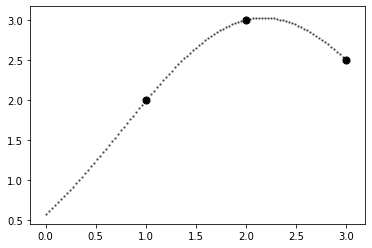

<Figure size 432x288 with 0 Axes>

In [ ]:
test_points = np.array([[i] for i in range(100)], dtype='float64') / 100 * X.shape[0]

predicted_points = rbf.predict(test_points).flatten()

plt.scatter(test_points, predicted_points, color='black', alpha=0.5, s=2)
plt.scatter(X, Y, color='black', s=50)

plt.show()
plt.clf()


#### Delete models

In [ ]:
lin_reg.delete()
self.delete()
rbf.delete()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK
        RBF             : OK

In [ ]:
X = np.array([
      [1.0, 1.0],
      [2.0, 2.0],
      [3.0, 1.0]
])
Y = np.array([
      2.0,
      3.0,
      2.5
])

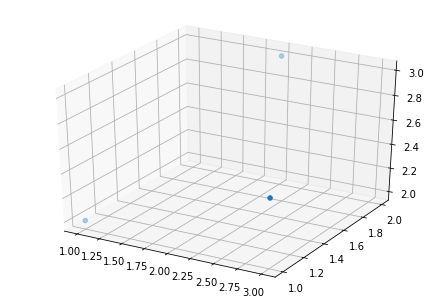

<Figure size 432x288 with 0 Axes>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

####Create models


In [ ]:
#Linear
lin_reg = PyLinearRegression(X.shape[1])

#MLP
layers = [X.shape[1], 1]
lr = 0.03
self = PyMLP(layers, lr, classification_mode=False)

#RBF
n_centroids = 0
rbf = PyRBF(n_centroids, 
            n_samples=X.shape[0],
           n_features=X.shape[1],
           n_outputs=1,
            gamma=0.01,
           classification_mode=False)

#### Train models

In [ ]:
#Linear
lin_reg.fit(X, Y)

#MLP
self.fit(X, Y, 10000)

#RBF
rbf.fit(X, Y)

In [ ]:
#After train
linear_pred = lin_reg.predict(X).flatten()
mlp_pred = self.predict(X).flatten()
rbf_pred = rbf.predict(X).flatten()

nb_errors_linear = (abs(linear_pred - Y) > 0.1).sum()
nb_errors_mlp = (abs(mlp_pred - Y) > 0.1).sum()
nb_errors_rbf = (abs(rbf_pred - Y) > 0.1).sum()

print('{: <20}'.format('Expected') + '  |  ' + '{: <20}'.format('Linear') + '  |  ' + '{: <20}'.format('MLP') + '  |  ' + '{: <20}'.format('RBF'))
for i in range(X.shape[0]):
  print('{: <20}'.format(Y[i]) + '  |  ' + '{: <20}'.format(linear_pred[i]) + '  |  ' + '{: <20}'.format(mlp_pred[i]) + '  |  ' + '{: <20}'.format(rbf_pred[i]))

print()
print("Linear errors : " + str(nb_errors_linear))
print("MLP errors : " + str(nb_errors_mlp))
print("RBF errors : " + str(nb_errors_rbf))

Expected              |  Linear                |  MLP                   |  RBF                 
2.0                   |  1.9999999999999996    |  1.9999999748527268    |  2.0                 
3.0                   |  2.9999999999999982    |  3.000000024821977     |  3.0                 
2.5                   |  2.499999999999999     |  2.5000000056563767    |  2.5                 

Linear errors : 0
MLP errors : 0
RBF errors : 0


#### Linear Separation

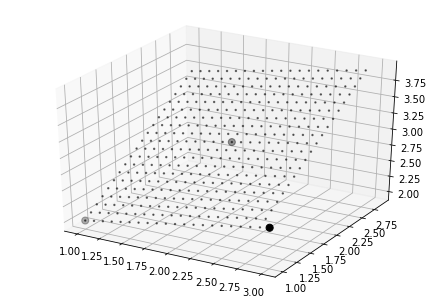

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)

test_points = np.array([[i, j] for i in range(20) for j in range(20)], dtype='float64') / 20 * 2 + 1

predicted_points = lin_reg.predict(test_points)

ax.scatter(test_points[:, 0], test_points[:, 1], predicted_points, color='black', alpha=0.5, s=2)
ax.scatter(X[:, 0],X[:, 1],Y, color='black', s=50)

plt.show()
plt.clf()


#### MLP Separation

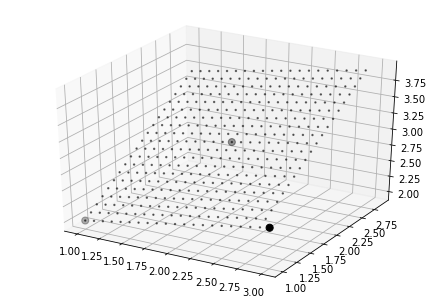

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)

test_points = np.array([[i, j] for i in range(20) for j in range(20)], dtype='float64') / 20 * 2 + 1

predicted_points = self.predict(test_points).flatten()

ax.scatter(test_points[:, 0], test_points[:, 1], predicted_points, color='black', alpha=0.5, s=2)
ax.scatter(X[:, 0],X[:, 1],Y, color='black', s=50)

plt.show()
plt.clf()


#### RBF Separation

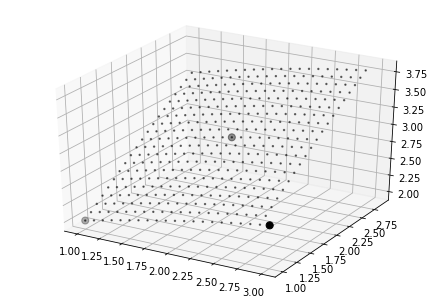

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)

test_points = np.array([[i, j] for i in range(20) for j in range(20)], dtype='float64') / 20 * 2 + 1

predicted_points = rbf.predict(test_points).flatten()

ax.scatter(test_points[:, 0], test_points[:, 1], predicted_points, color='black', alpha=0.5, s=2)
ax.scatter(X[:, 0],X[:, 1],Y, color='black', s=50)

plt.show()
plt.clf()


#### Delete models

In [ ]:
lin_reg.delete()
self.delete()
rbf.delete()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK
        RBF             : OK

In [ ]:
X = np.array([
      [1.0, 1.0],
      [2.0, 2.0],
      [3.0, 3.0]
])
Y = np.array([
      1.0,
      2.0,
      3.0
])

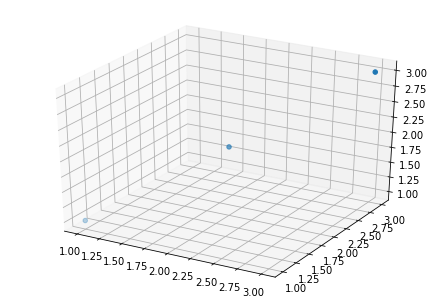

<Figure size 432x288 with 0 Axes>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

####Create models


In [ ]:
#Linear
lin_reg = PyLinearRegression(X.shape[1])

#MLP
layers = [X.shape[1], 1]
lr = 0.01
self = PyMLP(layers, lr, classification_mode=False)

#RBF
n_centroids = 0
rbf = PyRBF(n_centroids, 
            n_samples=X.shape[0],
           n_features=X.shape[1],
           n_outputs=1,
            gamma=0.01,
           classification_mode=False)

#### Train models

In [ ]:
#Linear
lin_reg.fit(X, Y) #temporary unsolved because there is no crate offering pseudo inverse

#MLP
self.fit(X, Y, 1000)

#RBF
rbf.fit(X, Y)

In [ ]:
#After train
linear_pred = lin_reg.predict(X).flatten()
mlp_pred = self.predict(X).flatten()
rbf_pred = rbf.predict(X).flatten()

nb_errors_linear = (abs(linear_pred - Y) > 0.1).sum()
nb_errors_mlp = (abs(mlp_pred - Y) > 0.1).sum()
nb_errors_rbf = (abs(rbf_pred - Y) > 0.1).sum()

print('{: <20}'.format('Expected') + '  |  ' + '{: <20}'.format('Linear') + '  |  ' + '{: <20}'.format('MLP') + '  |  ' + '{: <20}'.format('RBF'))
for i in range(X.shape[0]):
  print('{: <20}'.format(Y[i]) + '  |  ' + '{: <20}'.format(linear_pred[i]) + '  |  ' + '{: <20}'.format(mlp_pred[i]) + '  |  ' + '{: <20}'.format(rbf_pred[i]))

print()
print("Linear errors : " + str(nb_errors_linear))
print("MLP errors : " + str(nb_errors_mlp))
print("RBF errors : " + str(nb_errors_rbf))

Expected              |  Linear                |  MLP                   |  RBF                 
1.0                   |  1.0002492726912977    |  1.0063236435544805    |  0.9999999999998856  
2.0                   |  1.9999998337625073    |  2.0001980542536733    |  1.9999999999998912  
3.0                   |  2.999750394833717     |  2.994072464952866     |  2.9999999999998934  

Linear errors : 0
MLP errors : 0
RBF errors : 0


#### Linear Separation

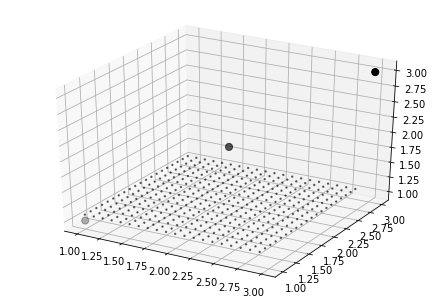

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)

test_points = np.array([[i, j] for i in range(20) for j in range(20)], dtype='float64') / 20 * 2 + 1

predicted_points = lin_reg.predict(test_points)

ax.scatter(test_points[:, 0], test_points[:, 1], predicted_points[2], color='black', alpha=0.5, s=2)
ax.scatter(X[:, 0],X[:, 1],Y, color='black', s=50)

plt.show()
plt.clf()


#### MLP Separation

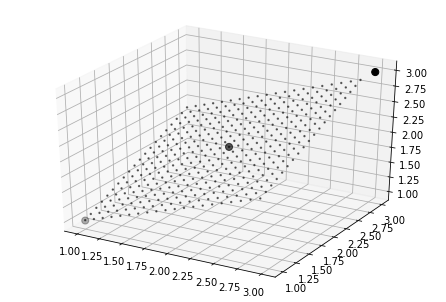

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)

test_points = np.array([[i, j] for i in range(20) for j in range(20)], dtype='float64') / 20 * 2 + 1

predicted_points = self.predict(test_points).flatten()

ax.scatter(test_points[:, 0], test_points[:, 1], predicted_points, color='black', alpha=0.5, s=2)
ax.scatter(X[:, 0],X[:, 1],Y, color='black', s=50)

plt.show()
plt.clf()


#### RBF Separation

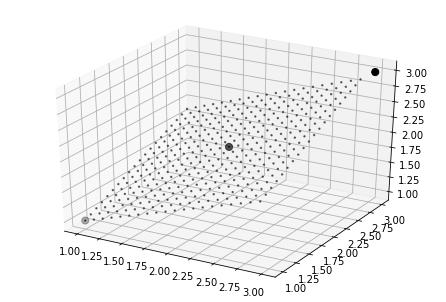

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)

test_points = np.array([[i, j] for i in range(20) for j in range(20)], dtype='float64') / 20 * 2 + 1

predicted_points = rbf.predict(test_points).flatten()

ax.scatter(test_points[:, 0], test_points[:, 1], predicted_points, color='black', alpha=0.5, s=2)
ax.scatter(X[:, 0],X[:, 1],Y, color='black', s=50)

plt.show()
plt.clf()


#### Delete models

In [ ]:
lin_reg.delete()
self.delete()
rbf.delete()

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK
        RBF                : OK

In [ ]:
X = np.array([
      [1.0, 0.0],
      [0.0, 1.0],
      [1.0, 1.0],
      [0.0, 0.0],
])
Y = np.array([
      2.0,
      1.0,
      -2.0,
      -1.0
])

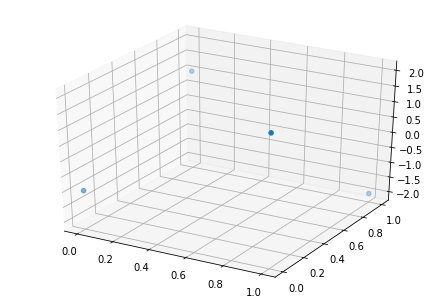

<Figure size 432x288 with 0 Axes>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

####Create models


In [ ]:
#Linear
lin_reg = PyLinearRegression(X.shape[1])

#MLP
layers = [X.shape[1], 2, 1]
lr = 0.01
self = PyMLP(layers, lr, classification_mode=False)

#RBF
n_centroids = 0
rbf = PyRBF(n_centroids, 
            n_samples=X.shape[0],
           n_features=X.shape[1],
           n_outputs=1,
            gamma=0.2,
           classification_mode=False)

#### Train models

In [ ]:
#Linear
lin_reg.fit(X, Y)

#MLP
self.fit(X, Y, 10000)

#RBF
rbf.fit(X, Y)

In [ ]:
#After train
linear_pred = lin_reg.predict(X).flatten()
mlp_pred = self.predict(X).flatten()
rbf_pred = rbf.predict(X).flatten()

nb_errors_linear = (abs(linear_pred - Y) > 0.1).sum()
nb_errors_mlp = (abs(mlp_pred - Y) > 0.1).sum()
nb_errors_rbf = (abs(rbf_pred - Y) > 0.1).sum()

print('{: <20}'.format('Expected') + '  |  ' + '{: <20}'.format('Linear') + '  |  ' + '{: <20}'.format('MLP') + '  |  ' + '{: <20}'.format('RBF'))
for i in range(X.shape[0]):
  print('{: <20}'.format(Y[i]) + '  |  ' + '{: <20}'.format(linear_pred[i]) + '  |  ' + '{: <20}'.format(mlp_pred[i]) + '  |  ' + '{: <20}'.format(rbf_pred[i]))

print()
print("Linear errors : " + str(nb_errors_linear))
print("MLP errors : " + str(nb_errors_mlp))
print("RBF errors : " + str(nb_errors_rbf))

Expected              |  Linear                |  MLP                   |  RBF                 
2.0                   |  0.5                   |  1.9999999845528948    |  1.999999999999997   
1.0                   |  -0.5                  |  0.9999999791700649    |  0.999999999999997   
-2.0                  |  -0.5                  |  -1.9999999938093234   |  -2.0000000000000027 
-1.0                  |  0.5                   |  -0.9999999909659489   |  -1.000000000000007  

Linear errors : 4
MLP errors : 0
RBF errors : 0


#### Linear Separation

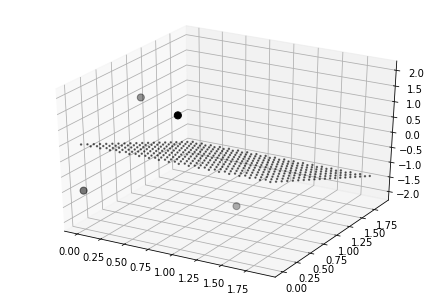

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)

test_points = np.array([[i, j] for i in range(20) for j in range(20)], dtype='float64') / 20 * 2 

predicted_points = lin_reg.predict(test_points).flatten()

ax.scatter(test_points[:, 0], test_points[:, 1], predicted_points, color='black', alpha=0.5, s=2)
ax.scatter(X[:, 0],X[:, 1],Y, color='black', s=50)

plt.show()
plt.clf()


#### MLP Separation

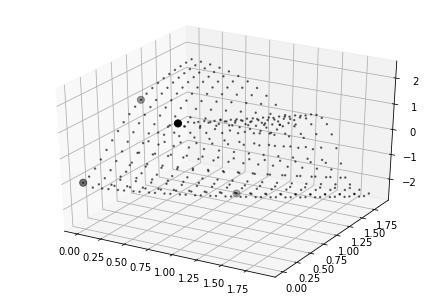

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)

test_points = np.array([[i, j] for i in range(20) for j in range(20)], dtype='float64') / 20 * 2 

predicted_points = self.predict(test_points).flatten()

ax.scatter(test_points[:, 0], test_points[:, 1], predicted_points, color='black', alpha=0.5, s=2)
ax.scatter(X[:, 0],X[:, 1],Y, color='black', s=50)

plt.show()
plt.clf()


#### RBF Separation

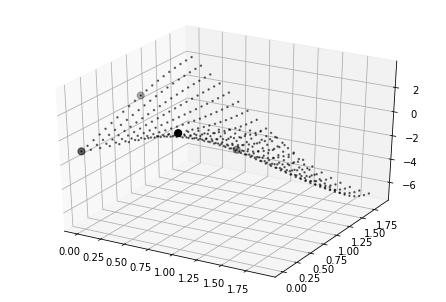

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)

test_points = np.array([[i, j] for i in range(20) for j in range(20)], dtype='float64') / 20 * 2 

predicted_points = rbf.predict(test_points).flatten()

ax.scatter(test_points[:, 0], test_points[:, 1], predicted_points, color='black', alpha=0.5, s=2)
ax.scatter(X[:, 0],X[:, 1],Y, color='black', s=50)

plt.show()
plt.clf()


#### Delete models

In [ ]:
lin_reg.delete()
self.delete()
rbf.delete()